<a href="https://colab.research.google.com/github/samriddhimakasare25/Heart-Attack-Prediction-Model/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devshah2021","key":"9ee02bf544ec28e077278fdc69adfb4e"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide             8KB  2023-02-01 12:22:51           3972        105  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                          23KB  2023-02-07 18:42:21           2895         81  1.0              
rajugc/imdb-top-250-movies-dataset                         IMDB Top 250 Movies Dataset                 52KB  2023-02-11 16:02:01           1119         40  1.0              
ahsan81/hotel-reservations-classification-dataset          Hotel Reservations Dataset                 480KB  2023-01-04 12:50:31  

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 657kB/s]


In [ ]:
!unzip heart-attack-analysis-prediction-dataset.zip

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

import scikitplot as skplt

import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
column1 = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
column2 = ['age', 'trtbps', 'oldpeak', 'chol', 'thalachh']
data[column1] = data[column1].astype(str)

In [ ]:
data.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
data.isnull()
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

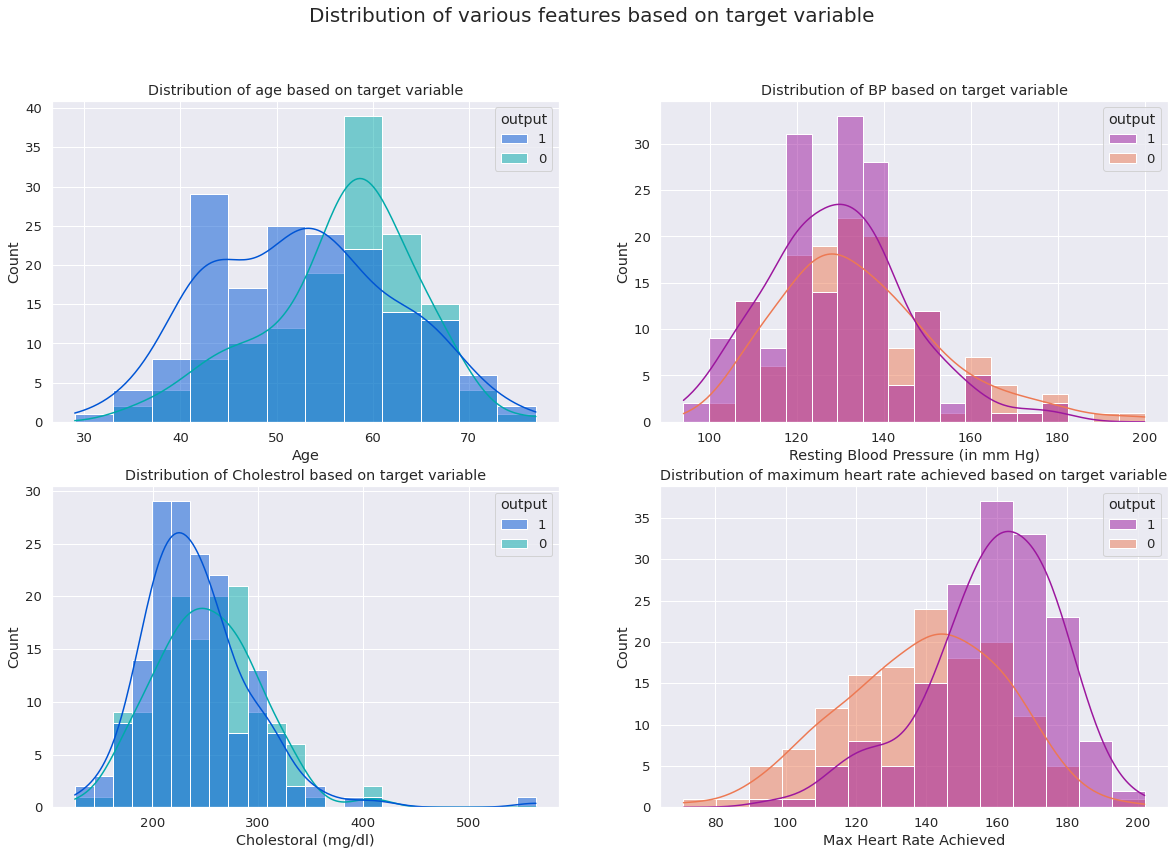

In [ ]:
sns.set_context("notebook", font_scale=1.2)
fig, ax = plt.subplots(2, 2, figsize=(20, 13))

plt.suptitle("Distribution of various features based on target variable", fontsize=20)

sns.histplot(x="age", data=data, hue="output", kde=True, ax=ax[0, 0], palette="winter", label="Age")
ax[0, 0].set(xlabel="Age", title="Distribution of age based on target variable")

sns.histplot(x="trtbps", data=data, hue="output", kde=True, ax=ax[0, 1], palette="plasma", label="Resting Blood Pressure (in mm Hg)")
ax[0, 1].set(xlabel="Resting Blood Pressure (in mm Hg)", title="Distribution of BP based on target variable")

sns.histplot(x="chol", data=data, hue="output", kde=True, ax=ax[1, 0], palette="winter", label="Cholestoral (mg/dl)")
ax[1, 0].set(xlabel="Cholestoral (mg/dl)", title="Distribution of Cholestrol based on target variable")

sns.histplot(x="thalachh", data=data, hue="output", kde=True, ax=ax[1, 1], palette="plasma", label="Max Heart Rate Achieved")
ax[1, 1].set(xlabel="Max Heart Rate Achieved", title="Distribution of maximum heart rate achieved based on target variable")

plt.show()


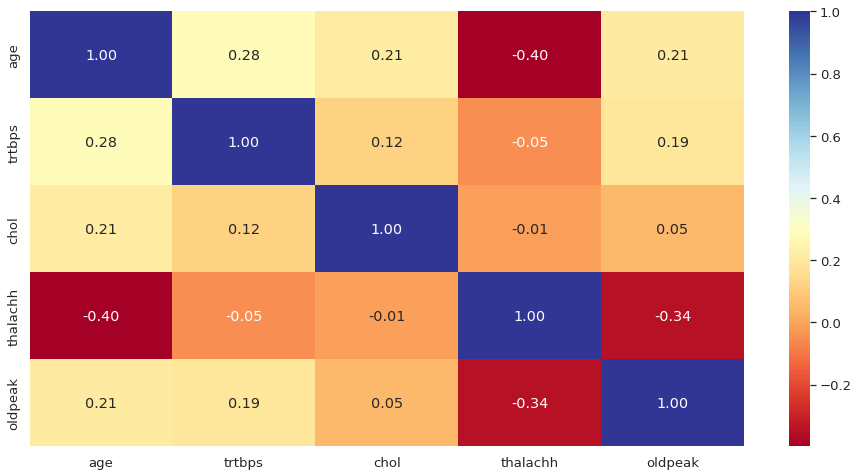

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlBu', fmt='.2f')

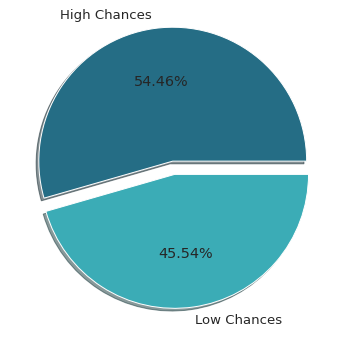

In [ ]:
plt.figure(figsize= (6, 8))
data_pie  = [165 , 138]
labels = ["High Chances", "Low Chances"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.show()

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output_1
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [ ]:
x1 = data.drop('output_1', axis=1)
y1 = data.output_1

In [ ]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size= 0.20,random_state= 42)

In [ ]:
print(X_train.shape)

(242, 22)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(22),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2300      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

In [ ]:
results = model.fit(X_train, y_train, epochs = 50, validation_split = 0.20)

Epoch 1/50
7/7 [==============================] - 4s 86ms/step - loss: 0.6874 - auc: 0.5820 - val_loss: 0.5914 - val_auc: 0.8129
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 0.6096 - auc: 0.7612 - val_loss: 0.5291 - val_auc: 0.8605
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 0.5497 - auc: 0.8241 - val_loss: 0.4862 - val_auc: 0.8835
Epoch 4/50
7/7 [==============================] - 0s 14ms/step - loss: 0.4942 - auc: 0.8725 - val_loss: 0.4544 - val_auc: 0.8963
Epoch 5/50
7/7 [==============================] - 0s 18ms/step - loss: 0.4480 - auc: 0.9001 - val_loss: 0.4325 - val_auc: 0.9014
Epoch 6/50
7/7 [==============================] - 0s 18ms/step - loss: 0.4361 - auc: 0.8953 - val_loss: 0.4163 - val_auc: 0.9090
Epoch 7/50
7/7 [==============================] - 0s 15ms/step - loss: 0.4177 - auc: 0.8974 - val_loss: 0.4057 - val_auc: 0.9116
Epoch 8/50
7/7 [==============================] - 0s 42ms/step - loss: 0.4105 - auc: 0.9019 - val

In [ ]:
evaluation = model.evaluate(X_test, y_test, verbose = 0)
print(f' Our accuracy is {evaluation[1]}')

 Our accuracy is 0.9137930870056152


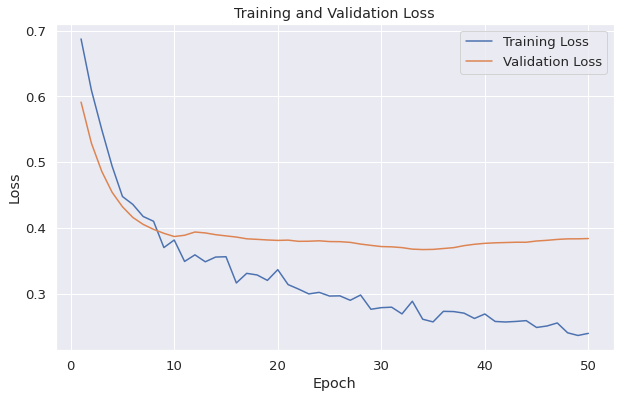

In [ ]:
# Set figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Extract loss data
epochs = range(1, 51)
train_loss = results.history['loss']
val_loss = results.history['val_loss']

# Plot loss data
ax.plot(epochs, train_loss, label="Training Loss")
ax.plot(epochs, val_loss, label="Validation Loss")

# Set title and axis labels
ax.set_title("Training and Validation Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

# Add legend and display plot
ax.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)
pred = np.round(pred).astype(int)

# Reshape to desired shape
pred = pred.reshape(61)

2/2 [==============================] - 0s 5ms/step


In [ ]:
print("Actual heart attacks (array)     :", y_test.values[:20])
print("Predicted heart attack (array)   :", pred[:20])

Actual heart attacks (array)     : [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0]
Predicted heart attack (array)   : [0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0]


In [ ]:
print(f'Accuracy of our model is {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy of our model is 86.89%
